<p style="text-align: center">
<img src="../../assets/images/dtlogo.png" alt="Duckietown" width="50%">
</p>

# 🚙 02 - Wheel Calibration

<!--
💻 🚙
-->

In this activity we will calibrate the motor / wheel assemblies of our robots by determining two calibration parameters, to ensure that:

1. Duckiebots go (reasonably) straight when commanded to do so, and
2. the wheels do not slip. 

You will need the Duckietown hardware to complete this activity. 

If you do not have a Duckiebot and Duckietown, proceed to the next activity: the [wheel encoders tutorial](../03-Wheel-Encoders-Tutorial/wheel_encoders_tutorial.ipynb).

## Motivation

We have derived a model of the Duckiebot's motors and kinematics:

<p style="text-align:center;">
<img src="../../assets/images/wheel-calibration/model.png" alt="Drawing" style="width: 500px;"/>
</p>

To obtain it, we introduced simplifying assumptions: 

1. The robot is symmetric along the the longitudinal axis;
2. The wheels do not slip.

Unfortunately, neither of these two assumptions really holds in practice. As a result: 

1. The robot will not drive straight when receiving equal commands to the wheels;
2. The wheels (might) slip. 

To mitigate these effects, we would like to:

1. Modify slightly the input to one or the other motor, to make sure the output the same travelled distance when provided with the same input;
2. Easily modify the overall Duckiebot speed, which is one of the most significant causes of slip (the slower the velocity, the lower the slipping).

In this activity we will calibrate the wheels, i.e., introduce and find two parameters that allow us to mitigate these undesired effects.

## Approach

Let's look at the relationship we derived between the voltage provided to each motors and the resulting angular velocity of the wheel:

$$ V_t = \left( R\frac{b}{K_i} + K_b \right) \dot \phi_t $$

The coefficient is a function of the wheel radius and the motor constants, which are difficult to estimate. We therefore lump all terms in a single unknown motor coefficient ($m$). Writing the same for right and left wheels, we get two motor coefficients to estimate: $m_r$ and $m_l$. 

To provide some physical insight, we reparametrize these two unknowns in two physically meaningful quantities, the _gain_ ($g$) and _trim_ ($t$), so that the relation can be thought as:

$$ V_{r,t} = \left( g + t \right) \dot \phi_{r,t} $$
$$ V_{l,t} = \left( g - t \right) \dot \phi_{l,t} $$

In this way we always have two parameters to find, but we know that increasing (decreasing) the gain will make the robot go faster (slower), while adjusting the trim value will correct asymmetries in the driving. (Note that in the physical implementation everything will be scaled by a constant - but no need to worry about that for now). 

## Calibrating the gain ($g$)

The gain parameter can have any value betwen 0 and 1. The default is set as 1. 

The objective of this first section is to determine a value of the gain that works well for your Duckiebot. There isn't a right or wrong number, the best value will vary depending on the desired driving experience. 

As a rule of thumb, we will want to set the gain for our robot to _the highest value that does not make the wheels slip_. 

Note that slippage will depend on the surface you drive your Duckiebot on, so we suggest to calibrate the gain while driving on the Duckietown tiles. 

Before starting the procedure: 

1. Make sure your Duckiebot is powered on and connected to the network. You can verify this by accessing the Dashboard > Robot page and visualizing live statistics, and / or by pinging the Duckiebot from your computer. 
2. Have your Duckietown built (at least, 3-4 tiles arranged in a straight). 

### Gain calibration procedure

1. Place your powered on Duckiebot on your Duckietown

2. Open a terminal on your computer, navigate to the exercise directory, and type:

       dts code build

to build the exercise. Then type:

       dts code workbench -b ROBOTNAME

3. Wait for the instance to finish initializing, then scroll up in the terminal until you find the VNC localhost URL (your port number will be different, below is just an example of expected output):

       INFO:dts: VNC running at http://localhost:8087/

4. Open a browser and navigate to that URL. 

5. Connect to VNC and open the virtual joystick and a terminal by double-clicking on the respective desktop icons, 
   
6. The default value of the gain is set at 1. You can verify this yourself by either typing:

       rosparam get /ROBOTNAME/kinematics_node/gain

   in the terminal (and pressing ENTER), or by navigating to your Dashboard > File Manager > Calibrations >   Kinematics and opening the file `default.yaml`.
    
7. Select the virtual joystick you previously opened in VNC, and drive your robot on the Duckietown. Bring it on a tour, try all movements (forward, back, left and right turns). Notice if the wheels are slipping. You can set a new value for the gain with:

       rosparam set /ROBOTNAME/kinematics_node/gain gain-value

   where `gain-value` is a number bewteen 0 and 1. The lower the number, the slower the robot will go and wheels will slip less.

8. Re-click on the joypad, and bring your Duckiebot on another tour. You should observe a different behavior consistent with the new gain value.

You can reiterate this process until you find a value that works for you.

🎯 **Protip**: You can copy and paste text between the host machine and VNC by using the clipboard on the left side of the VNC screen, hidden by an arrow. 

<p style="text-align:center;">
  <img src="../../assets/images/wheel-calibration/vnc-clipboard-hint.png" alt="copy-past-vnc" style="width: 600px;"/>
</p>
<p style="text-align:center;">The clipboard is hidden on the left of the VNC screen. Find the little arrow to open it.</p>

#### Save the new gain

Make sure to save your new gain! You can do so by typing, always in the same VNC terminal: 

    rosservice call /ROBOTNAME/kinematics_node/save_calibration

#### Final check to make sure the new value is stored

You can verify that the new gain value has been saved on your Duckiebot by opening the Dashboard > File Manager > Calibrations > Kinematics page. 

You should find a file named `ROBOTNAME.yaml` in addition to the `default.yaml`. Double click on it and verify that the gain value is indeed the one you chose.
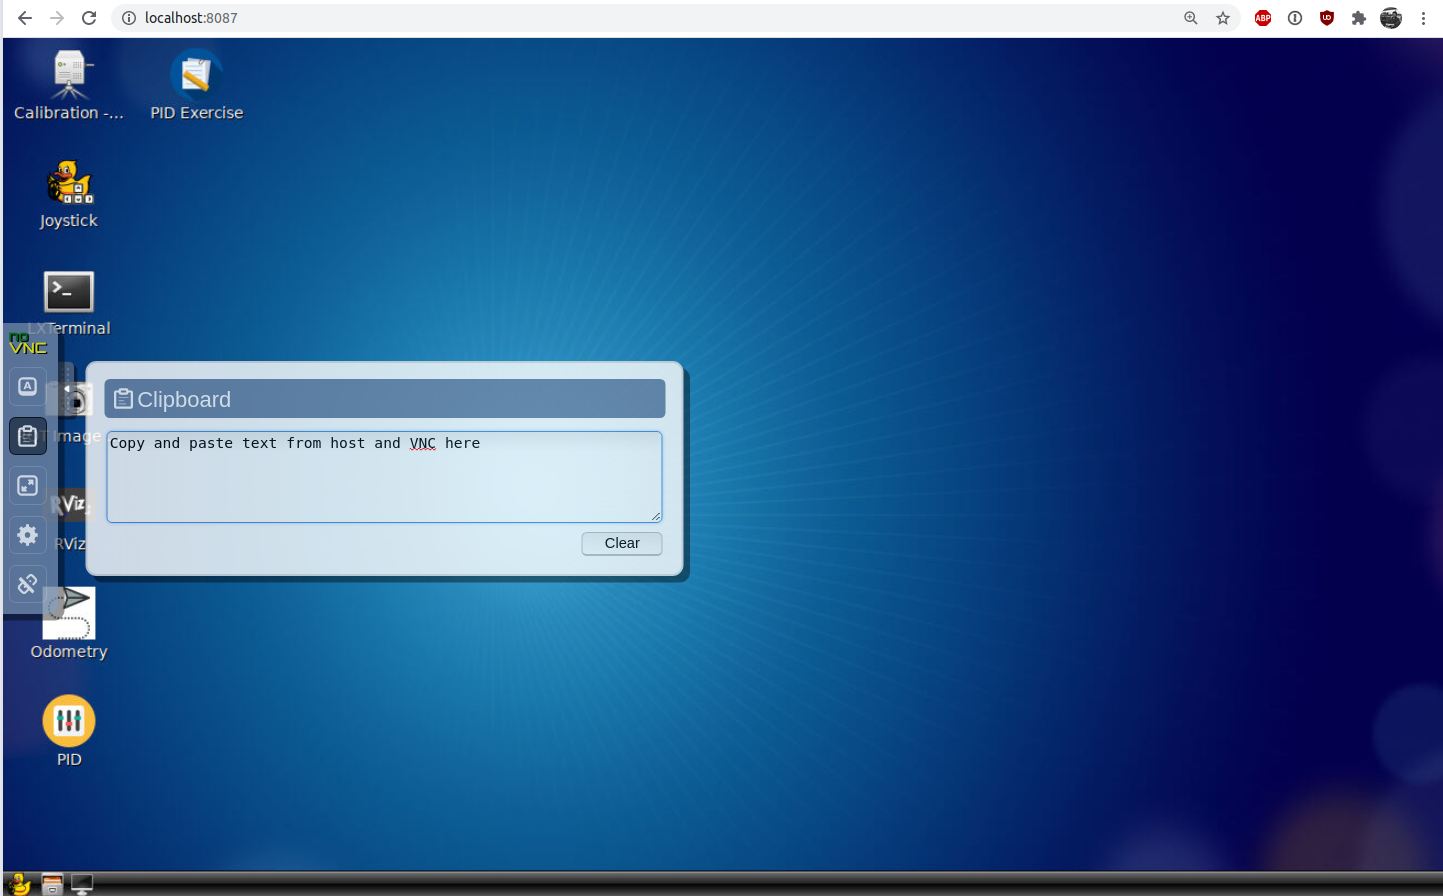

## Calibrating the trim ($t$)

This procedure is similar to that of calibrating the gain. 


### Trim calibration procedure 

1. FInish calibrating the gain by follow steps 1. to 5. of the gain calibration procedure above before proceeding furhter.
2. Place your Duckiebot on a lane, as shown below:

<p style="text-align: center">
<img src="../../assets/images/wheel-calibration/wheel-calib-setup.jpg" alt="Drawing" style="width: 300px;"/>
</p>

3. The default value of the trim is 0. Acceptable values are between -1 and 1. You can verify your current trim by opening a terminal in VNC and typing: 

       rosparam get /ROBOTNAME/kinematics_node/trim


4. Select the virtual joystick (arrow-pad) in VNC and drive straight (press only ⬆️) for roughly 2 meters (3 tiles)

5. Measure how distant the robot ended from the yellow line. If it's more than 10cm, try adjusting your trim:

    * Negative trim: steers more towards right
    * Positive trim: steers more towards left


6. Iterate the procedure until satisfaction. Note that you will never obtain a perfect behavior (and perfection is not necessary either thanks to feedback control).

Note: if you happen to remove the wheels of the Duckiebot for any reason at a later point in time, you might have to re-calibrate your trim value. 

### Saving the new trim value

Similarly to the gain, you want to make sure your new value is saved. You can do so by typing, always in the same VNC terminal you used to set the trim value:

    rosservice call /ROBOTNAME/kinematics_node/save_calibration

#### Final check to make sure it’s stored

Exactly as before, you can verify that the new gain value has been saved on your Duckiebot by opening the Dashboard > File Manager > Calibrations > Kinematics page. 

You should find a file named `ROBOTNAME.yaml` in addition to the `default.yaml`. Double click on it and verify that the trim value is indeed the one you chose. 

## Other kinematic parameters

You might have noticed that trim and gain are not the only kinematics parameters that are definied on the Duckiebot. There are other constants and constraints that we impose to have a Duckiebot drive safely. 

You can see them all by going VNC, opening a terminal, and typing:

       rosparam list /ROBOTNAME/kinematics_node

you should see something like this:

``` 
root@mycomputername:~# rosparam list /ROBOTNAME/kinematics_node
/ROBOTNAME/kinematics_node/baseline
/ROBOTNAME/kinematics_node/gain
/ROBOTNAME/kinematics_node/k
/ROBOTNAME/kinematics_node/limit
/ROBOTNAME/kinematics_node/omega_max
/ROBOTNAME/kinematics_node/radius
/ROBOTNAME/kinematics_node/trim
/ROBOTNAME/kinematics_node/v_max

```

Here is a brief descritpion of the role of each:

- gain (:obj:`float`): scaling factor applied to the desired velocity, default is 1.0

- trim (:obj:`float`): trimming factor that is typically used to offset differences in the behaviour of the left and right motors, it is recommended to use a value that results in the robot moving in a straight line when forward command is given, default is 0.0
            
- baseline (:obj:`float`): the distance between the two wheels of the robot, default is 0.1 (meters)

- radius (:obj:`float`): radius of the wheel, default is 0.0318 (meters)

- k (:obj:`float`): motor constant, assumed equal for both motors, default is 27.0

- limit (:obj:`float`): limits the final commands sent to the motors, default is 1.0

- v_max (:obj:`float`): limits the input velocity, default is 1.0

- omega_max (:obj:`float`): limits the input steering angle, default is 8.0


In this activity, we have calibrated the wheel assembly, through the gain and trim parameters. 

In the next activity, we will calibrate the parameters necessary to evaluate the odometry: radius and baseline. 

We do not recomend you modify any of the other parameters, except possibly for the `omega_max`, which determines the maximum rotation speed of the Duckiebot. If you believe your Duckiebot is rotating too quickly, you can follow the procedure above to reduce the `omega_max` value (e.g., `omega_max = 5.0` provides a joyful driving experience). 

You can now move on to the [wheel encoder tutorial](../03-Wheel-Encoders-Tutorial/wheel_encoders_tutorial.ipynb) activity. 